In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [17]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


1. gender – Пол клиента
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [18]:
# Проверим пропущенные значения
print(df.isnull().sum())

# Убедимся, что переменные категориальные
categorical_cols = ["gender", "Near_Location", "Promo_friends", "Phone", "Group_visits", "Churn"]
df[categorical_cols] = df[categorical_cols].astype("category")


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


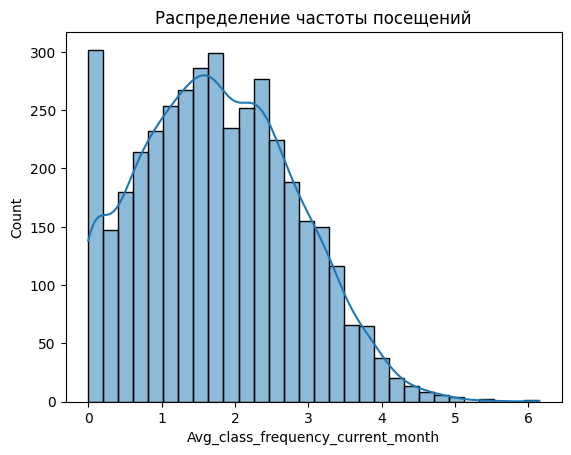

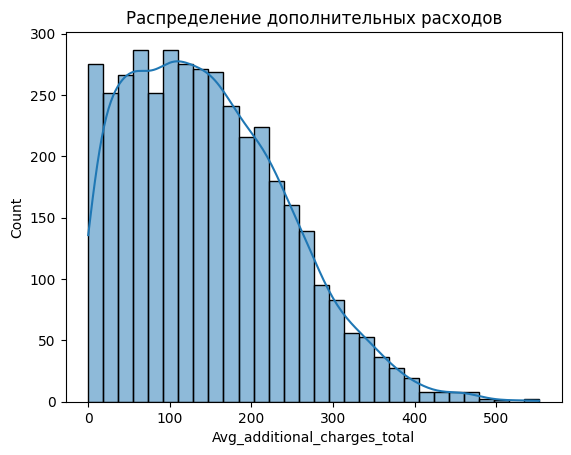

ShapiroResult(statistic=np.float64(0.9824996212637265), pvalue=np.float64(7.539838607142401e-22))
ShapiroResult(statistic=np.float64(0.9631216824678446), pvalue=np.float64(8.667115484007463e-31))


In [19]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Проверяем распределение средней частоты посещений
sns.histplot(df["Avg_class_frequency_current_month"], bins=30, kde=True)
plt.title("Распределение частоты посещений")
plt.show()

# Проверяем распределение расходов
sns.histplot(df["Avg_additional_charges_total"], bins=30, kde=True)
plt.title("Распределение дополнительных расходов")
plt.show()

# Тест Шапиро-Уилка (если p < 0.05, данные не нормальны)
print(stats.shapiro(df["Avg_class_frequency_current_month"]))
print(stats.shapiro(df["Avg_additional_charges_total"]))


In [20]:
# Разделяем данные на две группы: ушедшие и оставшиеся
group_0 = df[df["Churn"] == 0]["Avg_class_frequency_current_month"]
group_1 = df[df["Churn"] == 1]["Avg_class_frequency_current_month"]

In [21]:
# U-тест
u_stat, p_value = stats.mannwhitneyu(group_0, group_1, alternative="two-sided")
print(f"U-test для частоты посещений: p-value = {p_value:.4f}")


U-test для частоты посещений: p-value = 0.0000


p-value < 0.05 следовательно средняя частота посещений за последний месяц действительно изменилась у клиентов перед уходом.

Это говорит о том, что клиенты, скорее всего, реже посещают зал перед уходом. Возможно, это сигнал, что нужно вовремя выявлять таких клиентов и мотивировать их остаться (персональные предложения, акции, напоминания).

In [22]:
group_0 = df[df["Churn"] == 0]["Avg_additional_charges_total"]
group_1 = df[df["Churn"] == 1]["Avg_additional_charges_total"]

u_stat, p_value_u = stats.mannwhitneyu(group_0, group_1, alternative="two-sided")

print(f"U-test для расходов: p-value = {p_value_u:.4f}")


U-test для расходов: p-value = 0.0000


p-value < 0.05 следовательно средняя сумма дополнительных расходов действительно меняется перед уходом действительно изменилась у клиентов перед уходом.

Клиенты снижают свои доп. траты перед уходом, напиример меньше покупают напитки, персональные тренировки, аксессуары.